# Financial Analysis of the Impact of COVID-19 on the Banking Sector 


In this project, we'll be using the stock returns of various banks as a metric for the Financial Health of the Banking Sector during the COVID-19 pandemic. 
___
*Since the banking industry is primarily an oligopoly, the stock performance of the following major companies will be used to determine the overall health of the industry:*

* Bank of America
* Citigroup
* Goldman Sachs
* JP Morgan Chase
* Morgan Stanley
* Wells Fargo
* PNC Financial Services
* The Charles Schwab Corporation
* U.S. Bancorp
* Truist Financial Corporation

*These Banking and Financial Services Corporations were chosen primarily because they showed the most change in recent times*

First, we import our data visualization libraries

In [26]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

# Importing and Organizing the Data

**We'll be looking at the stock performance of these 10 companies for this year, with primary focus on the impact of the major spreading of the pandemic during the month of March, 2020 from which we'll get from Yahoo Finance**

*Note: This notebook was last updated on July 12th, 2020*

In [3]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,7,12)

In [5]:
#Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
#Citigroup
C = data.DataReader("C", 'yahoo', start, end)
#Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
#JP Morgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
#Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
#Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)
#PNC
PNC = data.DataReader("PNC", 'yahoo', start, end)
#Charles Schwab
SCHW = data.DataReader("SCHW", 'yahoo', start, end)
#U.S. Bancorp
USB = data.DataReader("USB", 'yahoo', start, end)
#Truist
TFC = data.DataReader("TFC", 'yahoo', start, end)

With our data, we'll combine each of the individual stock prices into one big DataFrame called bank_stocks, with each company having their own Ticker and Stock Information

In [8]:
tickers = ['BAC','C','GS','JPM','MS','WFC','PNC','SCHW','USB','TFC']

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC,PNC,SCHW,USB,TFC], axis = 1, keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

#Previewing our data to make sure everything is correct
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2020-01-02   35.660000  35.290001  35.349998  35.639999  37614200.0   
2020-01-03   35.150002  34.759998  34.980000  34.900002  50357900.0   
2020-01-06   34.900002  34.369999  34.410000  34.849998  42185000.0   
2020-01-07   34.919998  34.529999  34.700001  34.619999  34149000.0   
2020-01-08   35.189999  34.549999  34.570000  34.970001  45311600.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2020-01-02   35.168762  81.260002  80.029999  80.129997  81.230003  ...   
2020-01-03   34.438549  80.519997  79.449997  79.800003  79.699997  ...   
2020-01-06   34.389206  79.550003  78.720001  78.720001  79.449997  ...   
2020-01-07   34.162251  79.300003  78.730003  79.290001  78.760002  ...   
2020-01-08   34.507622  80.000000  78.680000  78.769997  79.360001  ...   

Bank Ticker        USB                                         TFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2020-01-02   59.470001  59.200001  5002100.0  57.823471  56.680000  55.880001   
2020-01-03   58.500000  58.509998  5161800.0  57.149513  56.299999  55.660000   
2020-01-06   57.070000  57.709999  6869200.0  56.368118  55.799999  55.150002   
2020-01-07   57.529999  57.160000  4006800.0  55.830906  55.669998  55.090000   
2020-01-08   57.200001  57.040001  5627500.0  55.713699  55.820000  55.310001   

Bank Ticker                                              
Stock Info        Open      Close     Volume  Adj Close  
Date                                                     
2020-01-02   56.410000  56.669998  5607100.0  55.401985  
2020-01-03   56.150002  56.200001  4434300.0  54.942505  
2020-01-06   55.490002  55.730000  9669300.0  54.483021  
2020-01-07   55.669998  55.490002  5272800.0  54.248394  
2020-01-08   55.419998  55.610001  6232700.0  54.365707  

[5 rows x 60 columns]

# Visualizing Price Change

Now that we have our stock data, let's visualize it to get a better idea of how well these companies, and as a result, most of sector is doing. 

First, we graph the closing price of the stocks of each of the 10 companies using an interactive graph. 

___
On March 11th, the World Health Organization (WHO) officially declared COVID-19 as a **Global Pandemic**. And as a result, if you look at the prices from the end of Febuary to April, there's an overal decline which makes sense as everyone started to really panick at this new global pandemic. 

However, we can also see that from April to July, the prices seem to slightly increase at a very small rate. This is likely because, after the initial shock of the Pandemic as well as most countries being locked down in quarantine for a couple months, everyone began adjusting to working from home and having online meetings.

___
The majority of the companies' stock index remained fairly constant after April, except for Goldman Sachs (**GS**) having a slight increase.

In [42]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot(title="Stock Price over Time in 2020")

And we can look at the increase in Goldman Sachs' stock price by comparing it to a 15-Day Moving Average (Which is just an average of the stock prices for consecutive 15 day periods).

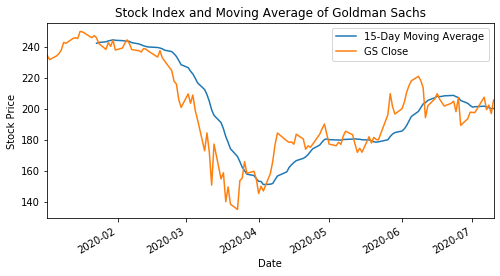

In [56]:
plt.figure(figsize=(8,4))
GS['Close'].loc['2020-01-01':'2020-07-12'].rolling(window=15).mean().plot(label='15-Day Moving Average')
GS['Close'].loc['2020-01-01':'2020-07-12'].plot(label='GS Close')
plt.legend()
plt.title("Stock Index and Moving Average of Goldman Sachs")
plt.ylabel("Stock Price")
plt.show()

Out of the 10 companies, it's had the highest increase in stock prices since the begining of April.

# Analyzing Returns

Now that we've analyzed total amounts of Stock Prices, we now want to analyze the change in prices, or in other words, the returns you would get if you invested in a certain company which are a good measure of how that company is performing.

The $Return$ on any stock at time $t$ is defined as the percent change of the initial $Price_{0}$ plus any Dividend $D$ 
by the final $Price_{t}$ 

$$R_t = \frac{P_t - P_{0} + D}{P_{0}}$$


We'll be creating a new DataFrame which we'll use to graph the returns using the Closing Price. For now, we'll ignore Dividends which shouldn't change the overall shape of our data.

In [60]:
returns = pd.DataFrame()

for tick in tickers:
    #Using pct_change to take the percent change of the closing price for the stock of each of the 10 companies
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()

And using our returns data, we can figure out the dates when each company had the lowest returns:

In [61]:
returns.idxmin()

BAC Returns    2020-03-16
C Returns      2020-03-16
GS Returns     2020-03-16
JPM Returns    2020-03-16
MS Returns     2020-03-16
WFC Returns    2020-03-12
PNC Returns    2020-03-16
SCHW Returns   2020-03-12
USB Returns    2020-03-09
TFC Returns    2020-03-16
dtype: datetime64[ns]

As you can see, from March 9th-March 16th was when these major banking companies had their **worst stock performances of the year** which makes sense, because March 11th was when the Coronavirus was labled as a **Global Pandemic**. Also, on March 13th, COVID-19 was offically became a **national emergency** in the United States, which is where a lot of these companies are based in and only added to global panic.

___

We can also look at how risky these stocks have been throughout the year, and through March to April. For this, we use
**Standard Deviation** which tells us by how much do the prices deviate from the average. In other words, a higher standard deviation means a **higher volatility** and thus more risky

In [62]:
#For the entire year, so far, Citigroup has the highest volatility
returns.std()

BAC Returns     0.046528
C Returns       0.054579
GS Returns      0.042497
JPM Returns     0.043232
MS Returns      0.046598
WFC Returns     0.047916
PNC Returns     0.045973
SCHW Returns    0.041791
USB Returns     0.046113
TFC Returns     0.052675
dtype: float64

In [72]:
#From March to April, Citigroup also has the highest Volatility, which increased from %5.45-->%8.07
returns.loc['2020-03-10':'2020-04-30'].std()

BAC Returns     0.069080
C Returns       0.080724
GS Returns      0.064479
JPM Returns     0.065964
MS Returns      0.072498
WFC Returns     0.069977
PNC Returns     0.070487
SCHW Returns    0.059967
USB Returns     0.067529
TFC Returns     0.077411
dtype: float64

As we can see, during the time period when panic arised from COVID-19, the volatility of all of the stocks increased, which tells us that they became more risky to trade with. The change in volatility isn't as noticable as in say the 2008 Financial Crisis, but it's still important nonetheless.
___

To better understand this idea, here's two distributions of Citigroup's stock price volatility for the entire 2020 year so far compared to during the couple months we just looked at:

Text(0.5, 1.0, 'Volatility of Citigroup Stock in 2020')

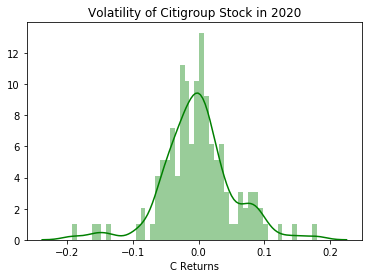

In [104]:
sns.distplot(returns.loc['2020-01-01':'2020-07-12']['C Returns'], color='green', bins=50).set_title('Volatility of Citigroup Stock in 2020')

Text(0.5, 1.0, 'Volatility of Citigroup Stock when COVID-19 was declared a Global Pandemic (March-April 2020)')

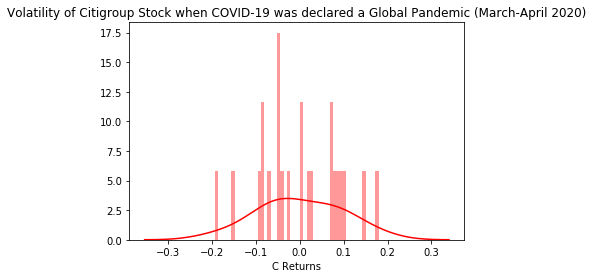

In [105]:
sns.distplot(returns.loc['2020-03-10':'2020-04-12']['C Returns'], color='red', bins=50).set_title("Volatility of Citigroup Stock when COVID-19 was declared a Global Pandemic (March-April 2020)")

As you can see above, when COVID-19 was declared a pandemic, the volatility(and therefore riskiness) of Citigroup stock had a range that was 0.1 greater on both positive and negative returns. This further proves the uncertainty and panic of the time.
___

As we saw in the very first graph, Citigroup's stock price has been increasing at a very minimal rate since April, while the other 9 companies we looked at had stock prices that stayed relatively the same ($\pm$ $3-4)

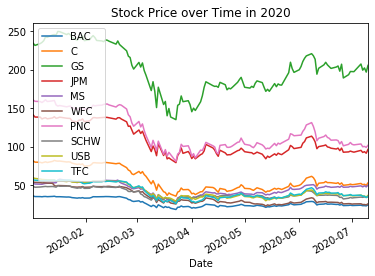

In [108]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(title="Stock Price over Time in 2020").legend(loc=2)

# Conclusion

From the sharp decline in stock index prices when COVID-19 was officially labled a **Global Pandemic** to the higher volatility of returns during the introduction of the Pandemic, we can conclude the Coronavirus has had an overall negative impact on not only the Physical health of hundreds of millions of people, but also of the Financial Health of the Banking Sector